This notebook will contain what I understand about Stochastic Gradient Descent which is an optimisation method commonly used in neural networks.

In [0]:
%matplotlib inline
from fastai.basics import *

#Linear Regression Problem

Here we are trying to fit a line into a set of points

In [0]:
n = 100

In [3]:
x = torch.ones(n,2)
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[-0.2017,  1.0000],
        [-0.4951,  1.0000],
        [ 0.9563,  1.0000],
        [ 0.9991,  1.0000],
        [-0.1918,  1.0000]])

In [4]:
a = tensor(3.,2) ; a

tensor([3., 2.])

In [0]:
y = x@a + torch.rand(n)

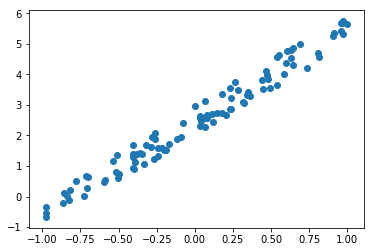

In [6]:
plt.scatter(x[:,0],y);

Here we want to find a parameter such that the error between the points and the line x@a will be minimised. For a reggression problem the most common error is mean squared error

In [0]:
def mse(y_hat,y): return((y_hat-y)**2).mean()

In [0]:
a = tensor(-1.,1)

In [9]:
y_hat = x@a
mse(y_hat,y) 

tensor(7.2689)

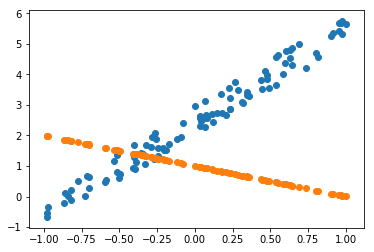

In [10]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat)

Now the model is ready and the evaluation criteria ie.. loss function is specified. Now we need to handle the optimizataion, that is how de we find the best value for a that is the best fitting linear regression.

# Gradient Descent

We now need to find a fuinction that will minimise the mse_loss.
Gradient descenet is an algoritham that minimize functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of paramenters value and itratively moves todawrds a set of parameter values that minimize the function. This iterative minimization is achieved by takiung steps in the negative direction of the function gradient.

In [11]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [0]:
def update():
        y_hat = x@a
        loss = mse(y,y_hat)
        if t % 10 == 0: print(loss)
        loss.backward()
        with torch.no_grad():
          a.sub_(lr*a.grad)
          a.grad.zero_()


In [13]:
lr = 1e-1
for t in range(100): update()

tensor(7.2689, grad_fn=<MeanBackward0>)
tensor(1.5161, grad_fn=<MeanBackward0>)
tensor(0.5076, grad_fn=<MeanBackward0>)
tensor(0.2090, grad_fn=<MeanBackward0>)
tensor(0.1182, grad_fn=<MeanBackward0>)
tensor(0.0905, grad_fn=<MeanBackward0>)
tensor(0.0821, grad_fn=<MeanBackward0>)
tensor(0.0795, grad_fn=<MeanBackward0>)
tensor(0.0787, grad_fn=<MeanBackward0>)
tensor(0.0785, grad_fn=<MeanBackward0>)


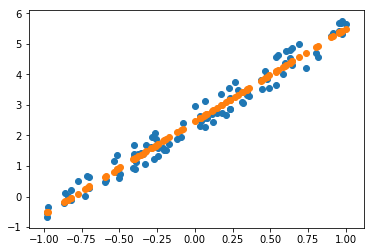

In [15]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a)

# Animate It

In [0]:
from matplotlib import animation,rc
rc('animation',html="jshtml")

In [21]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0],y,c='orange')
line, = plt.plot(x[:,0],x@a)
plt.close()

def animate(i):
      update()
      line.set_ydata(x@a)
      return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)   